In [6]:
import optuna 
import xgboost as xgb
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import sklearn
from sklearn.metrics import mean_squared_error
import operator
from scipy.stats import ks_2samp
from sklearn.model_selection import StratifiedKFold, KFold

In [25]:
df = pd.read_csv('..\\kaggle_data\\train.csv')

In [8]:
def create_folds(df, n_s=5, n_grp=None):
    df['Fold'] = -1
    
    if n_grp is None:
        skf = KFold(n_splits=n_s)
        target = df.target
    else:
        skf = StratifiedKFold(n_splits=n_s)
        df['grp'] = pd.cut(df.target, n_grp, labels=False)
        target = df.grp
    
    for fold_no, (t, v) in enumerate(skf.split(target, target)):
        df.loc[v, 'Fold'] = fold_no
    return df

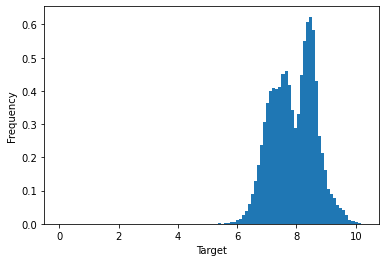

In [9]:
plt.hist(df['target'], bins=100, density=True)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

In [27]:
df = create_folds(df, n_s=10, n_grp=1000)
df

c:\users\ryans\source\repos\venvs\python375\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target,Fold,grp
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043,0,705
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331,0,798
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091,0,757
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716,0,677
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046,0,774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499995,0.216974,0.735265,0.648648,0.255387,0.616353,0.345197,0.295718,0.304357,0.314351,0.860504,0.315397,0.247682,0.486542,0.288750,7.385215,9,719
299996,499996,0.545799,0.165139,0.220966,0.190053,0.359362,0.386336,0.365767,0.344217,0.466446,0.454581,0.360251,0.360755,0.292535,0.619984,7.242617,9,705
299997,499997,0.284401,0.841542,0.957585,0.340383,0.396279,0.330376,0.525687,0.260039,0.378174,0.526925,0.491735,0.516629,0.173521,0.714552,9.592487,9,934
299998,499998,0.481900,0.622346,0.540032,0.823118,0.283066,0.434283,0.174342,0.710843,0.358690,0.648272,0.984647,1.001110,0.063956,0.377693,8.207951,9,799


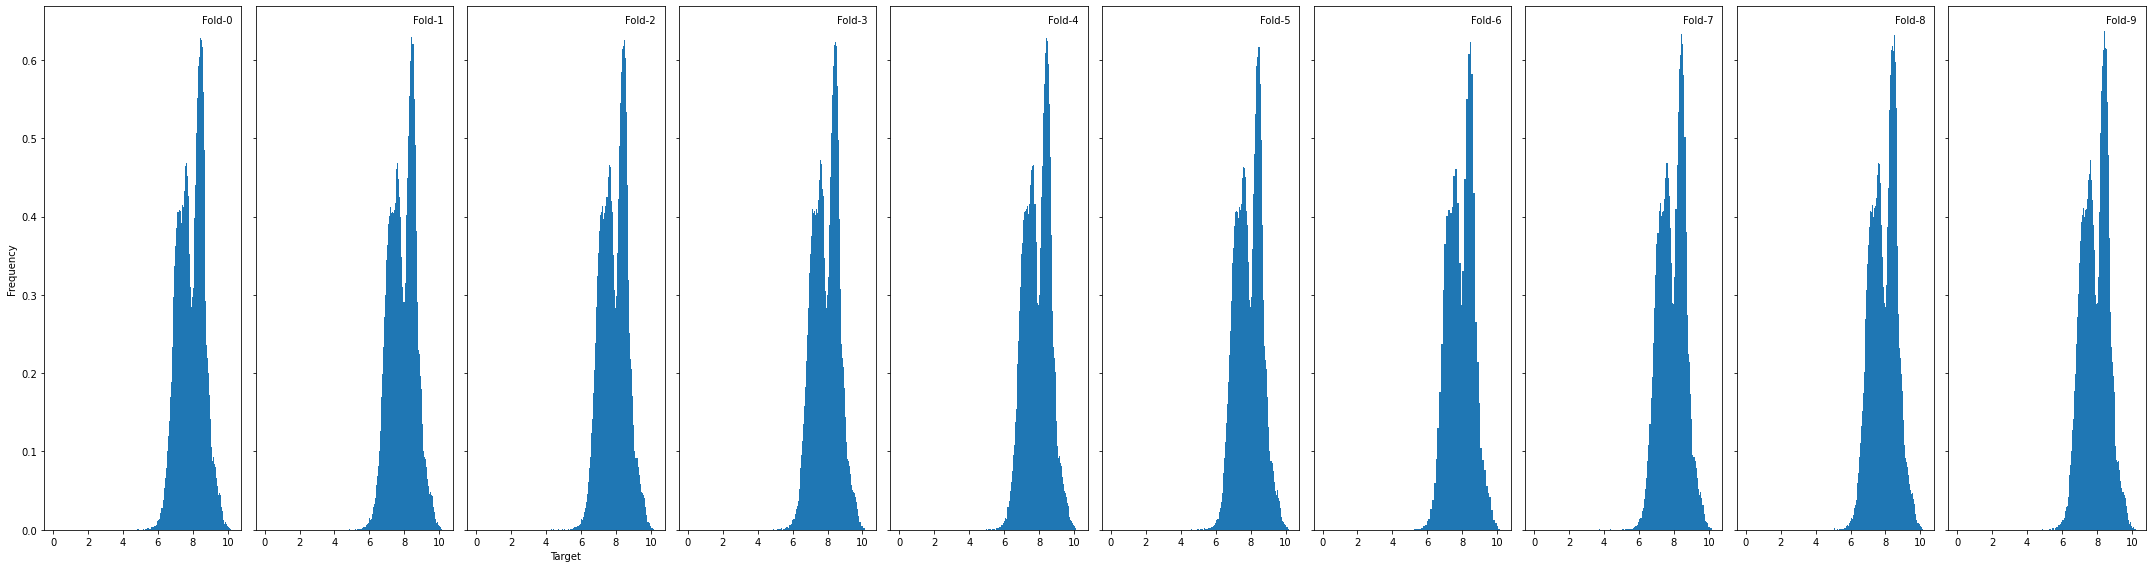

In [29]:
fig, axs = plt.subplots(1, 10, sharex=True, sharey=True, figsize=(30,8))
for i, ax in enumerate(axs):
    ax.hist(df[df.Fold == i]['target'], bins=100, density=True, label=f'Fold-{i}')
    if i == 0:
        ax.set_ylabel('Frequency')
    if i == 2:
        ax.set_xlabel("Target")
    ax.legend(frameon=False, handlelength=0)
plt.tight_layout()
plt.show()

In [30]:
for fold in np.sort(df.Fold.unique())[1:]:
    print(f'Fold 0 vs {fold}:', ks_2samp(df.loc[df.Fold==0,'target'], df.loc[df.Fold==fold,'target']))

Fold 0 vs 1: KstestResult(statistic=0.0009666666666666712, pvalue=1.0)
Fold 0 vs 2: KstestResult(statistic=0.0010999999999999899, pvalue=1.0)
Fold 0 vs 3: KstestResult(statistic=0.0013000000000000234, pvalue=1.0)
Fold 0 vs 4: KstestResult(statistic=0.0010666666666667157, pvalue=1.0)
Fold 0 vs 5: KstestResult(statistic=0.0010999999999999899, pvalue=1.0)
Fold 0 vs 6: KstestResult(statistic=0.0009666666666666712, pvalue=1.0)
Fold 0 vs 7: KstestResult(statistic=0.0012666666666666937, pvalue=1.0)
Fold 0 vs 8: KstestResult(statistic=0.0010666666666666602, pvalue=1.0)
Fold 0 vs 9: KstestResult(statistic=0.0010666666666666602, pvalue=1.0)


In [26]:
columns = [col for col in df.columns.to_list() if col not in ['id','target']]
data=df[columns]
target=df['target']


kf = KFold(n_splits=5,random_state=48,shuffle=True)

for fold in kf.split(df[columns],df['target']):
    print(f'Fold 0 vs {fold}:', ks_2samp(df.loc[df.Fold==0,'target'], df.loc[df.Fold==fold,'target']))

AttributeError: 'DataFrame' object has no attribute 'Fold'